In [372]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [373]:
def calcGaussian(x,mu,sigma,pi = 1):
    # Calculate the denominator of the Gaussian distribution
    denominator = math.sqrt(2 * math.pi * sigma**2)
    
    # Calculate the exponent term
    exponent = -0.5 * ((x - mu) / sigma) ** 2
    
    # Calculate the Gaussian distribution
    gaussian = (1 / denominator) * np.exp(exponent)
    
    return pi*gaussian

In [374]:
def plotGaussian(x,gauss,N=1000):
    
    plt.plot(x,gauss)
    plt.grid(visible=True)
    plt.xlabel("x")
    plt.ylabel("p(x)")
    
    return

In [375]:
def calcParams(D):
    muML = np.mean(D)
    sigmaML = np.mean((D-muML)**2)
    return muML,np.sqrt(sigmaML);

Q2:

In [376]:
def q2(mu,sig):
    N = 1000;
    x = np.linspace(mu-4*sig,mu+4*sig,N)
    gauss = calcGaussian(x,mu,sig)
    plotGaussian(x,gauss,N)
    plt.title("Estimated Gaussian");
    plt.legend(["mu = %.1f, sigma = %.1f" %(mu,sig**2)]) 
    return #np.array([mu,sig])

Q3:

In [377]:
def q3(mu,sig, N = 1000):
    x = np.linspace(min(mu-4*sig),max(mu+4*sig),N)
    gauss_real = calcGaussian(x,mu[1],sig[1])
    plotGaussian(x,gauss_real);
    plt.title("Real Gaussian vs. Estimated Gaussian");
    plt.legend(labels = ("Est: mu = %.1f, sigma = %.1f" %(mu[0],sig[0]**2), "Real: mu = %.1f, sigma = %.1f" %(mu[1],sig[1]**2)))
    return

Q4:

In [378]:
def q4(mu_,sig_,N_ = 30):
    newD = np.random.normal(mu_,sig_,N_)
    params = calcParams(newD);
    mu = np.array([params[0], mu_]);
    sig = np.array([params[1], sig_]);
    q2(mu[0],sig[0]) # plot on Data basis
    q3(mu,sig) # plot real gauss
    return

Q5:

In [379]:
def q5(mu_,sig_,N_=30):
    muVec = np.array([]);
    sigVec = np.array([]);
    for i in range(10):
        newD = np.random.normal(mu_,sig_,N_)
        params = calcParams(newD);
        muVec = np.append(muVec,params[0]); # for later calculations of grid
        sigVec = np.append(sigVec,params[1]); # etc.
        q2(params[0],params[1]);
    
    muVec = np.append(muVec,mu_);
    sigVec = np.append(sigVec,sig_);
    q3(muVec,sigVec);
    
    return
        
    
        

Q6:

In [380]:
# implemented in main using q5

In [381]:
def main():
    # Data for all questions:
    D = np.array([1.42,5.01,2.45,1.92,1.41,4.83,1.81]);
    
    # q2:
    plt.figure()
    params = calcParams(D)
    q2(params[0],params[1]);

    # q3 (uses plot of estimated gaussian called in q2):
    plt.figure()
    q2(params[0],params[1]); # plot est gauss
    
    mu = np.array([params[0], 2]);
    sig = np.array([params[1],np.sqrt(1.5)]);
    q3(mu,sig); # plot real gauss
    
    # q4 (uses functions of q3,q2 with new data)
    plt.figure()
    q4(mu[1],sig[1]);
    
    # q5
    plt.figure()
    q5(mu[1],sig[1]);
    plt.legend(["mu = %.1f, sigma = %.1f" %(mu[1],sig[1]**2)]) # real values for sigma and mu
    
    # q6 (based on q5 that take N as an input)
    plt.figure()
    N = 3000
    q5(mu[1],sig[1],N)
    plt.legend(["mu = %.1f, sigma = %.1f" %(mu[1],sig[1]**2)]) # real values for sigma and mu
    
    return

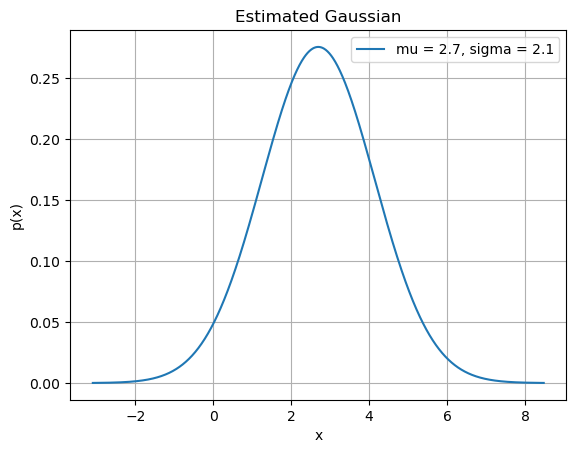

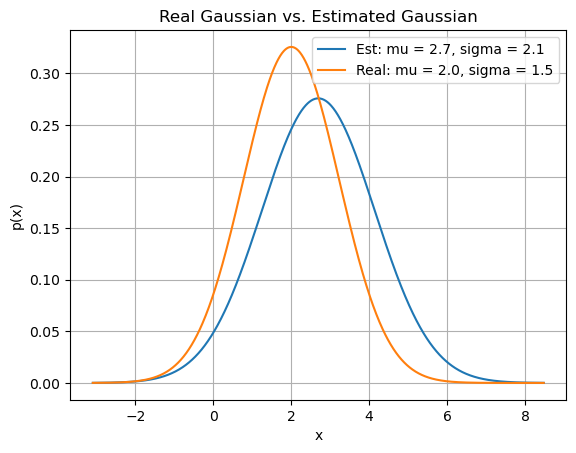

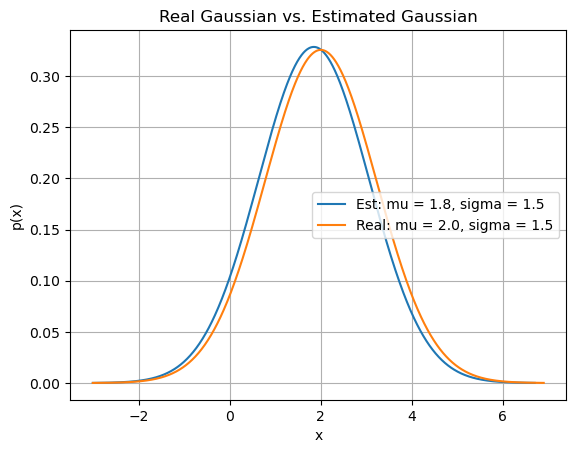

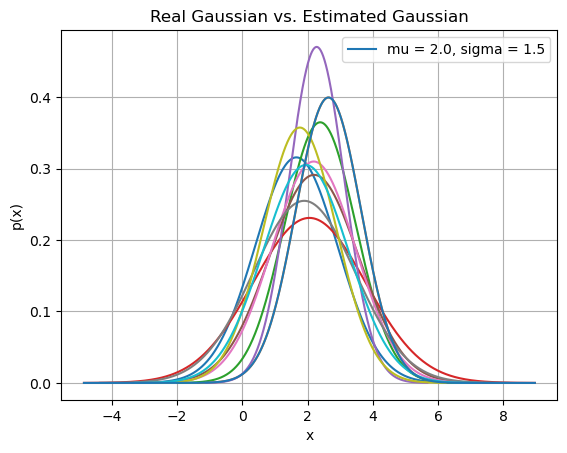

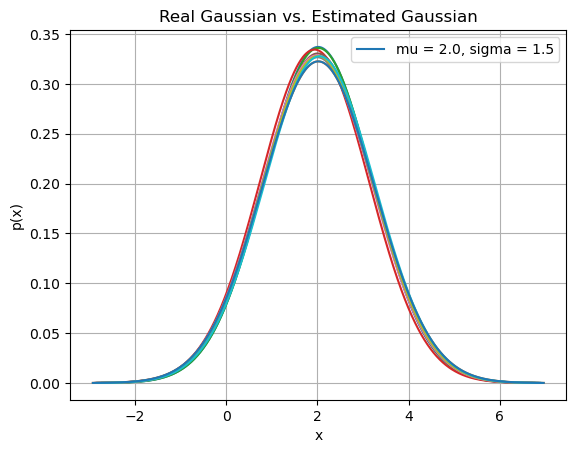

In [382]:
main()

שאלה 7:

מסקנות
- משערך התוחלת הוא משערך חסר הטיה אסימפטוטית, משמע, שככל שנגדיל את כמות הדגימות שאנחנו מגרילים, כך נתקרב לממוצע האמיתי של התהליך
- משערך השונות מתקרב גם הוא לערך השונות האמיתי ככל שמגדילים את אורך המדגם